In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [15]:
df=pd.read_csv('Fraud_check.csv')
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [17]:
df.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [20]:
df.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [22]:
df.duplicated().sum()

0

In [23]:
from sklearn.preprocessing import OrdinalEncoder

In [24]:
oe=OrdinalEncoder()

In [26]:
cat_col=df.select_dtypes([object]).columns

In [27]:
cat_col

Index(['Undergrad', 'Marital.Status', 'Urban'], dtype='object')

In [28]:
df[cat_col]=oe.fit_transform(df[cat_col])

In [29]:
df[cat_col]

,Undergrad,Marital.Status,Urban
0,0.0,2.0,1.0
1,1.0,0.0,1.0
2,0.0,1.0,1.0
3,1.0,2.0,1.0
4,0.0,1.0,0.0
...,...,...,...
595,1.0,0.0,1.0
596,1.0,0.0,1.0
597,0.0,0.0,1.0
598,1.0,1.0,0.0


In [30]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0.0,2.0,68833,50047,10,1.0
1,1.0,0.0,33700,134075,18,1.0
2,0.0,1.0,36925,160205,30,1.0
3,1.0,2.0,50190,193264,15,1.0
4,0.0,1.0,81002,27533,28,0.0


In [38]:
df['Tax']=df['Taxable.Income'].map(lambda x: 'Risky' if x<=30000 
                                   else 'good')

In [40]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Tax
0,0.0,2.0,68833,50047,10,1.0,good
1,1.0,0.0,33700,134075,18,1.0,good
2,0.0,1.0,36925,160205,30,1.0,good
3,1.0,2.0,50190,193264,15,1.0,good
4,0.0,1.0,81002,27533,28,0.0,good


In [42]:
x=df.iloc[:,:-1]
y=df['Tax']

In [43]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=1)

In [44]:
dt=DecisionTreeClassifier()

In [45]:
dt.fit(xtrain,ytrain)
ypred=dt.predict(xtest)
ypred

array(['Risky', 'good', 'Risky', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'Risky', 'good', 'good', 'Risky', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'Risky', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'Risky', 'good', 'good', 'good', 'Risky', 'good', 'Risky',
       'good', 'good', 'Risky', 'good', 'good', 'good', 'good', 'good',
       'good', 'Risky', 'good', 'good', 'good', 'good', 'good', 'Risky',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'Risky', 'Risky', 'good', 'good', 'Risky', 'good', 'good',
       'Risky', 'good', 'good', 'Risky', 'Risky', 'good', 'good', 'good',
       'Risky', 'Risky', 'good', 'Risky', 'good', 'good', 'good', 'Risky',
       'good', 'good', 'good', 'Risky', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 

In [47]:
dt.score(xtrain,ytrain),dt.score(xtest,ytest)

(1.0, 1.0)

[Text(0.5, 0.75, 'X[2] <= 30055.5\ngini = 0.332\nsamples = 480\nvalue = [101, 379]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 101\nvalue = [101, 0]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 379\nvalue = [0, 379]')]

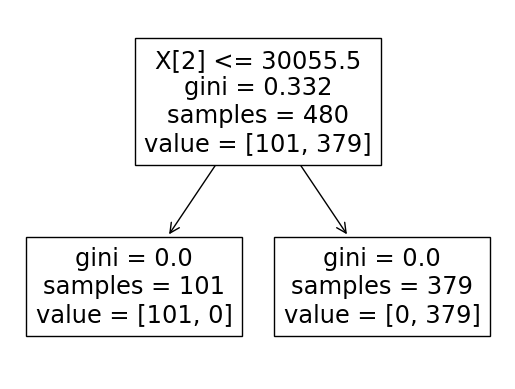

In [48]:
tree.plot_tree(dt)